### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np
m = np.arange(12).reshape((3,4))

print(m)
print("overall mean: ", np.mean(m))   
print("column mean: ", np.mean(m, axis = 0))   
print("row mean: ", np.mean(m, axis = 1)) 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
overall mean:  5.5
column mean:  [4. 5. 6. 7.]
row mean:  [1.5 5.5 9.5]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [86]:
import numpy as np
import copy
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

o = np.zeros((4,4))
print (np.outer(u,v,o))
#print (o) #grazie alla riga precedente, il prodotto esterno è stato assegnato ad o

o = np.zeros((4,4))
for i in range (4):
    for j in range (4):
        o[i,j]= u[i]*v[j]
print (o)

w=u.copy()
z=v.copy()
o = np.zeros((4,4))
t=z[:, np.newaxis] * w[np.newaxis,:]
o=np.asmatrix(t)
print(o)


[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [75]:
import numpy as np
import numpy.random as npr
npr.seed(321)
a=npr.rand(10,6)
print(a)
mask = (a <= 0.1) 
a[np.ix_(*np.where(np.any(mask, axis=1))),:] = 0
a[:,np.ix_(*np.where(np.any(mask, axis=0)))] = 0
print(a)

[[0.88594794 0.07791236 0.97964616 0.24767146 0.75288472 0.52667564]
 [0.90755375 0.8840703  0.08926896 0.5173446  0.34362129 0.21229369]
 [0.36067344 0.27077517 0.76162502 0.4780419  0.09899468 0.27539478]
 [0.79442731 0.51397031 0.45329481 0.25515125 0.1139766  0.82431305]
 [0.3177535  0.15230703 0.21497959 0.91211032 0.04311515 0.37595241]
 [0.31796557 0.35403302 0.93335757 0.3885452  0.89593944 0.14550322]
 [0.4903603  0.9233404  0.8013113  0.84837182 0.66544598 0.14321914]
 [0.11609391 0.07739594 0.38291192 0.14642985 0.44785731 0.35552736]
 [0.43314193 0.80080664 0.35500568 0.0477506  0.8495784  0.62342568]
 [0.14159893 0.99707981 0.43055091 0.92260123 0.23040647 0.51684848]]
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.79442731 0.         0.         0.         0.         0.82431305]
 [0.         0.         0.       

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.2693

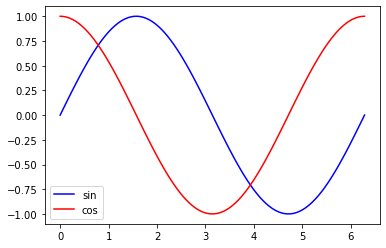

In [1]:
import numpy as np
a=np.linspace(0, 2*np.pi, 100)
print (a[0:99:10])
print (a[::-1])
mask = (np.abs(np.sin(a)-np.cos(a))<=0.1) #ha true dove è vero
b=a[mask]
print(b)

import matplotlib.pyplot as plt
plt.plot(a, np.sin(a), 'b', label='sin')
plt.plot(a, np.cos(a), 'r', label='cos')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [105]:
x = range(1,11) 
y = range(1,11)

mult_table = [[i*j for j in y] for i in x]
a=np.array(mult_table)
print(np.trace(a))

def anti_diagonal(arr):
    return np.fliplr(arr).diagonal()

print (anti_diagonal(a))
print(np.diagonal(a, offset=1, axis1=0, axis2=1))

385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [123]:
import numpy as np
xval=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
yval=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
d=np.abs([xval[:, np.newaxis] - yval[np.newaxis, :]])
#non riuscivo ad interpretare meglio "grid of distances"
print(d)
print(np.dot(d, 1.6093))

[[[   0  198  303  736  871 1175 1475 1544 1913 2448]
  [ 198    0  105  538  673  977 1277 1346 1715 2250]
  [ 303  105    0  433  568  872 1172 1241 1610 2145]
  [ 736  538  433    0  135  439  739  808 1177 1712]
  [ 871  673  568  135    0  304  604  673 1042 1577]
  [1175  977  872  439  304    0  300  369  738 1273]
  [1475 1277 1172  739  604  300    0   69  438  973]
  [1544 1346 1241  808  673  369   69    0  369  904]
  [1913 1715 1610 1177 1042  738  438  369    0  535]
  [2448 2250 2145 1712 1577 1273  973  904  535    0]]]
[[[   0.      318.6414  487.6179 1184.4448 1401.7003 1890.9275 2373.7175
   2484.7592 3078.5909 3939.5664]
  [ 318.6414    0.      168.9765  865.8034 1083.0589 1572.2861 2055.0761
   2166.1178 2759.9495 3620.925 ]
  [ 487.6179  168.9765    0.      696.8269  914.0824 1403.3096 1886.0996
   1997.1413 2590.973  3451.9485]
  [1184.4448  865.8034  696.8269    0.      217.2555  706.4827 1189.2727
   1300.3144 1894.1461 2755.1216]
  [1401.7003 1083.0589  914.08

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [2]:
import numpy as np

def prime_numbers(N):
    a=np.arange(N)
    mask=np.array([True]*N)
    for i in range(N):
        for j in range (2,i-1):
            if i % j == 0:
                mask[i]=False
    a=a[mask]
    return a

print(prime_numbers(100))

#for i in [100,1000,10000]:
    #%timeit prime_numbers(i)

#Check the performances (timeit); how does it scale with N?
#100: 891 µs ± 90.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
#1000: 75.9 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
#10000: 8.07 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
 
def sieve_of_eratosthenes (N):
    a=np.arange(N)
    mask=np.array([True]*N)
    for i in range (2, int(pow(N, 1/2))):
        if mask[i]:
            for j in range(pow(i,2),N,i):
                mask[j]=False           
    a=a[mask]
    return a

print (sieve_of_eratosthenes(100))

#for i in [100,1000,10000]:
    #%timeit sieve_of_eratosthenes(i)

#Check the performances (timeit); how does it scale with N?
#100: 20.1 µs ± 441 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
#1000: 242 µs ± 63.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
#10000: 2.16 ms ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

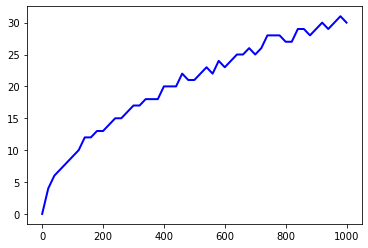

In [62]:
import numpy.random as npr
m=np.array([0]*51)
for i in range(20,1000+1,20):
    r=npr.randint(0,2,size=(1000,i))
    indices_zero = (r == 0)
    r[indices_zero] =-1 
    s= np.sum(r,axis=1)
    s=s[:,np.newaxis]
    m[int(i/20)]=np.sqrt(np.mean(s**2,axis=0))

import matplotlib.pyplot as plt
plt.plot(range(0,1000+1,20), m, linewidth=2, markersize=12, color='b')
plt.show()

#Did you get what you expected? No, I didn't expect a positive slope

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

(21, 4)


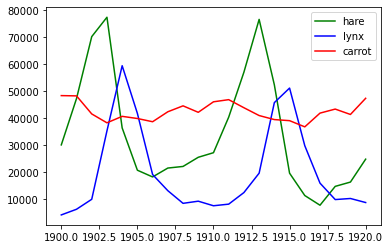

Main statistical properties of the carrot array (1), the hare array (2) and the lynx array (3): 
 
min: 36700.0
year of the min: 1916
max: 48300.0
year of the max: 1900
mean: 42400.0
median: 41800.0
standard deviation: 3322.5062255844787
 
 
min: 7600.0
year of the min: 1917
max: 77400.0
year of the max: 1903
mean: 34080.95238095238
median: 25400.0
standard deviation: 20897.906458089667
 
 
min: 4000.0
year of the min: 1900
max: 59400.0
year of the max: 1904
mean: 20166.666666666668
median: 12300.0
standard deviation: 16254.591536908763
 
correlation matrix between carrot and hare:  [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
correlation matrix between carrot and lynx:  [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
correlation matrix between hare and lynx:  [[1.         0.07189206]
 [0.07189206 1.        ]]
Highest population each year: 
1900.0 : carrot
1901.0 : carrot
1902.0 : hare
1903.0 : hare
1904.0 : lynx
1905.0 : lynx
1906.0 : carrot
1907.0 : carrot
1908.0 : c

In [26]:
import numpy as np
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt 
#il comando sopra non mi era accessibile, lavorando su windows, quindi per le mie prove
#ho semplicemente caricato il file. Spero che eseguendolo voi su linux tutto funzioni
file = open("populations.txt", "r")
#for i in range (5):
    #x = file.readline().strip()
    #print(x)
p=np.loadtxt('populations.txt')    
print(p.shape)
year=p[:,0]
hare=p[:,1]
lynx=p[:,2]
carrot=p[:,3]

import matplotlib.pyplot as plt
plt.plot(year, hare, 'g', label='hare')
plt.plot(year, lynx, 'b', label='lynx')
plt.plot(year, carrot, 'r', label='carrot')
plt.legend()
plt.show()

print("Main statistical properties of the carrot array (1), the hare array (2) and the lynx array (3): ")
for i in [carrot, hare, lynx]:
    print (" ")
    print ("min:", np.min(i)) 
    print ("year of the min:", (1900+np.argmin(i)))
    print ("max:", np.max(i))
    print ("year of the max:", (1900+np.argmax(i)))
    print ("mean:", np.mean(i))
    print ("median:", np.median(i)) # so weird, median is not a method of the array class..
    print ("standard deviation:", np.std(i))
    print (" ")    

print("correlation matrix between carrot and hare: ", np.corrcoef(carrot,hare))
print("correlation matrix between carrot and lynx: ", np.corrcoef(carrot,lynx))
print("correlation matrix between hare and lynx: ", np.corrcoef(hare, lynx))

print("Highest population each year: ")
for y,c,h,l in zip(list(year),list(carrot), list(hare), list(lynx)):
    if (c>h and c>l):
        print (y, ": carrot") 
    if (h>c and h>l):
        print (y, ": hare")
    if (l>c and l>h):
        print (y, ": lynx") 